In [1]:
import nltk
import numpy as np
import pandas as pd
import time

import pickle
from os import path
import matplotlib.pyplot as plt

In [144]:
subdir = './datasets/twitter/'
files = ['bank_train.csv', 'bank_test.csv', 'bank_test_etalon.csv', 'ttk_train.csv', 'ttk_test.csv', 'ttk_test_etalon.csv']
files = [path.join(subdir, x) for x in files]
df_dict = {}

In [145]:
for i in files:
    df_dict[i] = pd.read_csv(i, index_col=0)

In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#we can add stop words

import pymorphy2
def tokenize(text):
    text = text.lower()
    text_list = nltk.word_tokenize(text)
    morph = pymorphy2.MorphAnalyzer()
    text_list = [word for word in text_list if word[0] != '@' and len(word) > 1 and word.isalpha()]
    text_list = [morph.parse(word)[0].normal_form for word in text_list]
    text_list = [x for x in text_list if x not in stop_words ]
    return text_list

In [15]:
tokens = {}
for k, v in df_dict.items():
    l = [tokenize(x) for x in v['text']]
    tokens[k] = l

In [16]:
import pickle
with open('tokens_stat.pcl', 'wb') as fout:
    pickle.dump(tokens, fout)

In [23]:
for k, v in tokens.items():
    print ('~~~~~~~~`')
    print (path.basename(k))
    len_list = np.array([len(x) for x in v if len(x) > 0])
    print ('min: {}'.format(np.min(len_list)))
    print ('mean: {}'.format(np.mean(len_list)))
    print ('max: {}'.format(np.max(len_list)))

~~~~~~~~`
bank_train.csv
min: 1
mean: 7.5438
max: 24
~~~~~~~~`
ttk_test.csv
min: 1
mean: 7.682871678914641
max: 23
~~~~~~~~`
ttk_test_etalon.csv
min: 1
mean: 7.65953561179233
max: 19
~~~~~~~~`
bank_test_etalon.csv
min: 1
mean: 6.900835532102023
max: 20
~~~~~~~~`
ttk_train.csv
min: 1
mean: 7.947758206565252
max: 24
~~~~~~~~`
bank_test.csv
min: 1
mean: 6.972400756143667
max: 20


In [24]:
for k, v in tokens.items():
    print ('~~~~~~~~`')
    print (path.basename(k))
    len_list = np.array([len(x) for x in v])
    unique, count = np.unique(len_list, return_counts=True)
    for i,j in zip(unique, count):
        print ('{}: {}'.format(i, j))

~~~~~~~~`
bank_train.csv
1: 3
2: 12
3: 49
4: 468
5: 1190
6: 903
7: 513
8: 350
9: 272
10: 255
11: 207
12: 210
13: 182
14: 167
15: 137
16: 59
17: 13
18: 3
19: 3
20: 3
24: 1
~~~~~~~~`
ttk_test.csv
0: 15
1: 64
2: 183
3: 327
4: 427
5: 587
6: 584
7: 572
8: 495
9: 467
10: 401
11: 382
12: 292
13: 255
14: 150
15: 63
16: 35
17: 14
18: 4
19: 3
22: 1
23: 1
~~~~~~~~`
ttk_test_etalon.csv
0: 12
1: 45
2: 108
3: 221
4: 325
5: 448
6: 413
7: 415
8: 360
9: 354
10: 306
11: 285
12: 214
13: 163
14: 110
15: 40
16: 20
17: 5
19: 1
~~~~~~~~`
bank_test_etalon.csv
0: 1
1: 14
2: 42
3: 175
4: 733
5: 927
6: 641
7: 452
8: 376
9: 309
10: 234
11: 196
12: 173
13: 145
14: 71
15: 30
16: 22
17: 4
18: 2
19: 1
20: 1
~~~~~~~~`
ttk_train.csv
0: 4
1: 35
2: 105
3: 252
4: 462
5: 591
6: 583
7: 509
8: 457
9: 374
10: 348
11: 356
12: 334
13: 240
14: 164
15: 93
16: 42
17: 24
18: 11
19: 4
20: 6
21: 4
23: 1
24: 1
~~~~~~~~`
bank_test.csv
0: 6
1: 27
2: 67
3: 229
4: 798
5: 1005
6: 710
7: 546
8: 443
9: 383
10: 300
11: 250
12: 201
13: 172
14:

In [3]:
with open('tokens_stat.pcl', 'rb') as fin:
    tokens = pickle.load(fin)

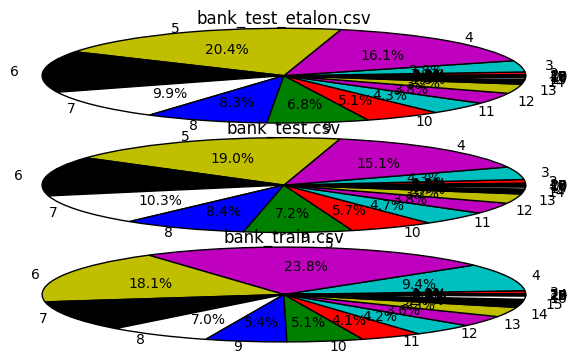

In [17]:

fig, axises = plt.subplots(3,1)
i = 0
for k, v in tokens.items():
    if k in files[:3]:
        axis_name = path.basename(k)
        axis = axises[i]
        len_list = np.array([len(x) for x in v])
        unique, count = np.unique(len_list, return_counts=True)
        axis.pie(count, labels=unique, radius=1.3, autopct='%1.1f%%')
        axis.set_title(axis_name)
        i += 1
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


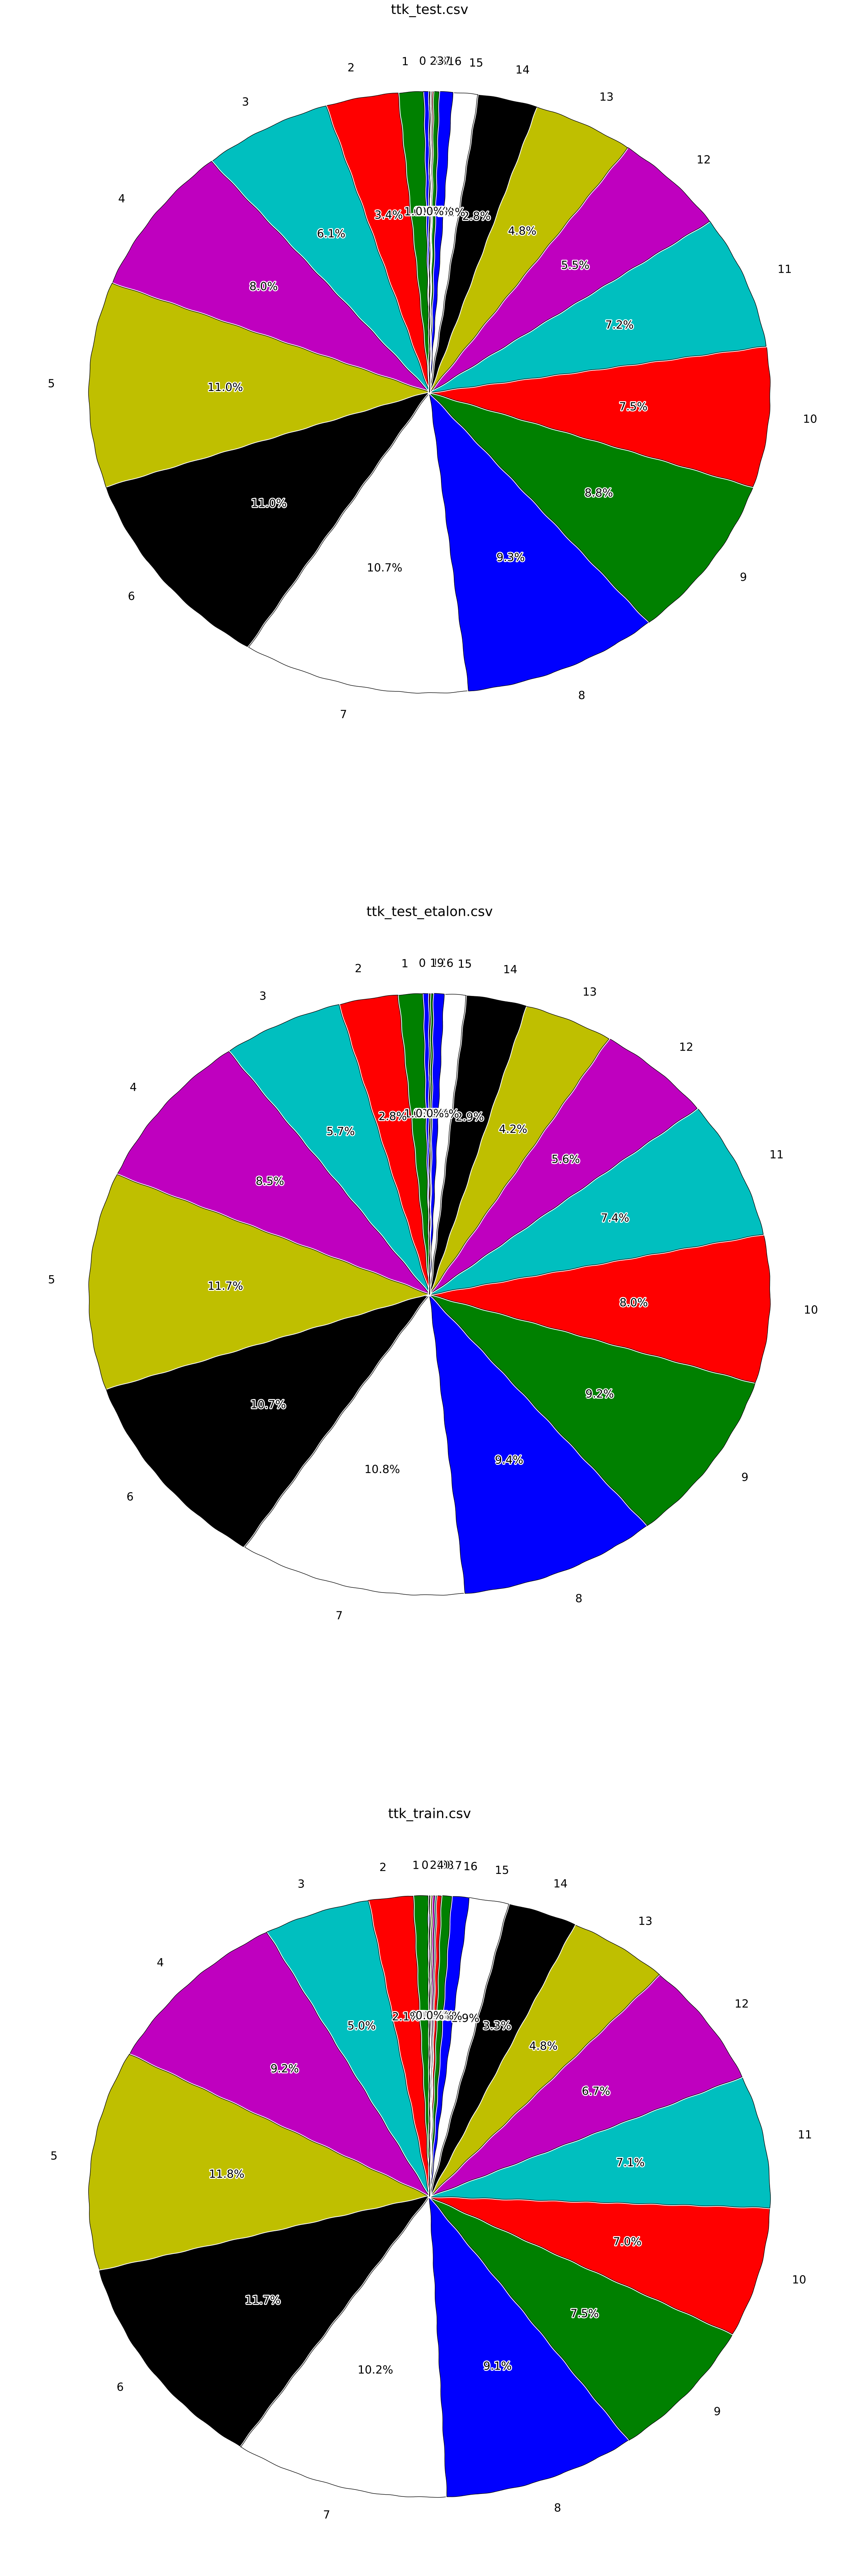

In [41]:
import matplotlib
fig = plt.figure(figsize=(30, 90))
 #fig = plt.figure(figzise = (10, 10))
i = 1
matplotlib.rcParams.update({'font.size': 22})
for k, v in tokens.items():
    if k in files[3:]:
        axis_name = path.basename(k)
        axis = fig.add_subplot(3,1,i)
        len_list = np.array([len(x) for x in v])
        unique, count = np.unique(len_list, return_counts=True)
        axis.pie(count, labels=unique, autopct='%1.1f%%',startangle=90)
        axis.set_title(axis_name)
        i += 1
plt.show()

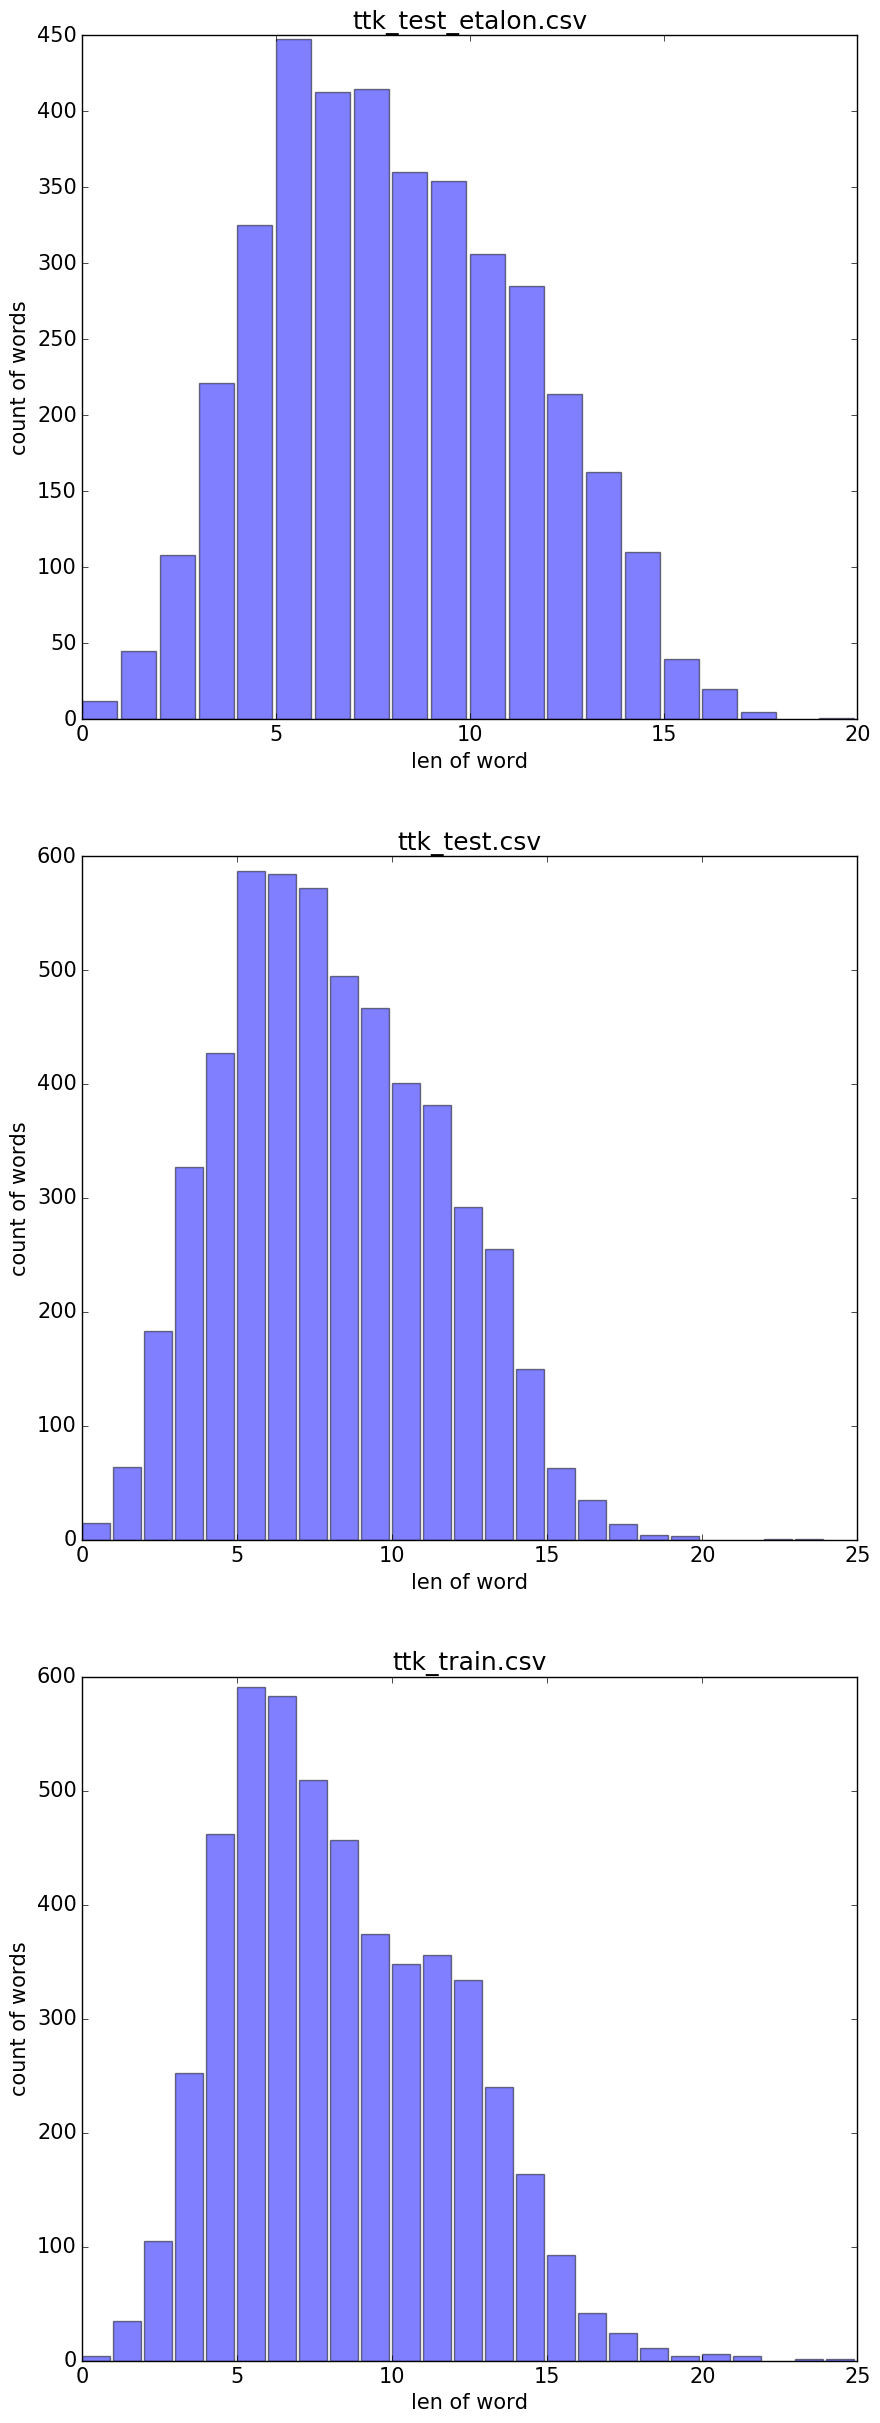

In [22]:
import matplotlib
fig = plt.figure(figsize=(10, 30))
i = 1
matplotlib.rcParams.update({'font.size': 15})
for k, v in tokens.items():
    if k in files[3:]:
        axis_name = path.basename(k)
        axis = fig.add_subplot(3,1,i)
        len_list = np.array([len(x) for x in v])
        unique, count = np.unique(len_list, return_counts=True)
        plt.bar(unique, count, width=0.9, color='b', alpha=0.5)
        axis.set_title(axis_name)
        axis.set_ylabel('count of words')
        axis.set_xlabel('len of word')
        i += 1
plt.show()

/home/parkin/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(-1, 1 + 1) instead


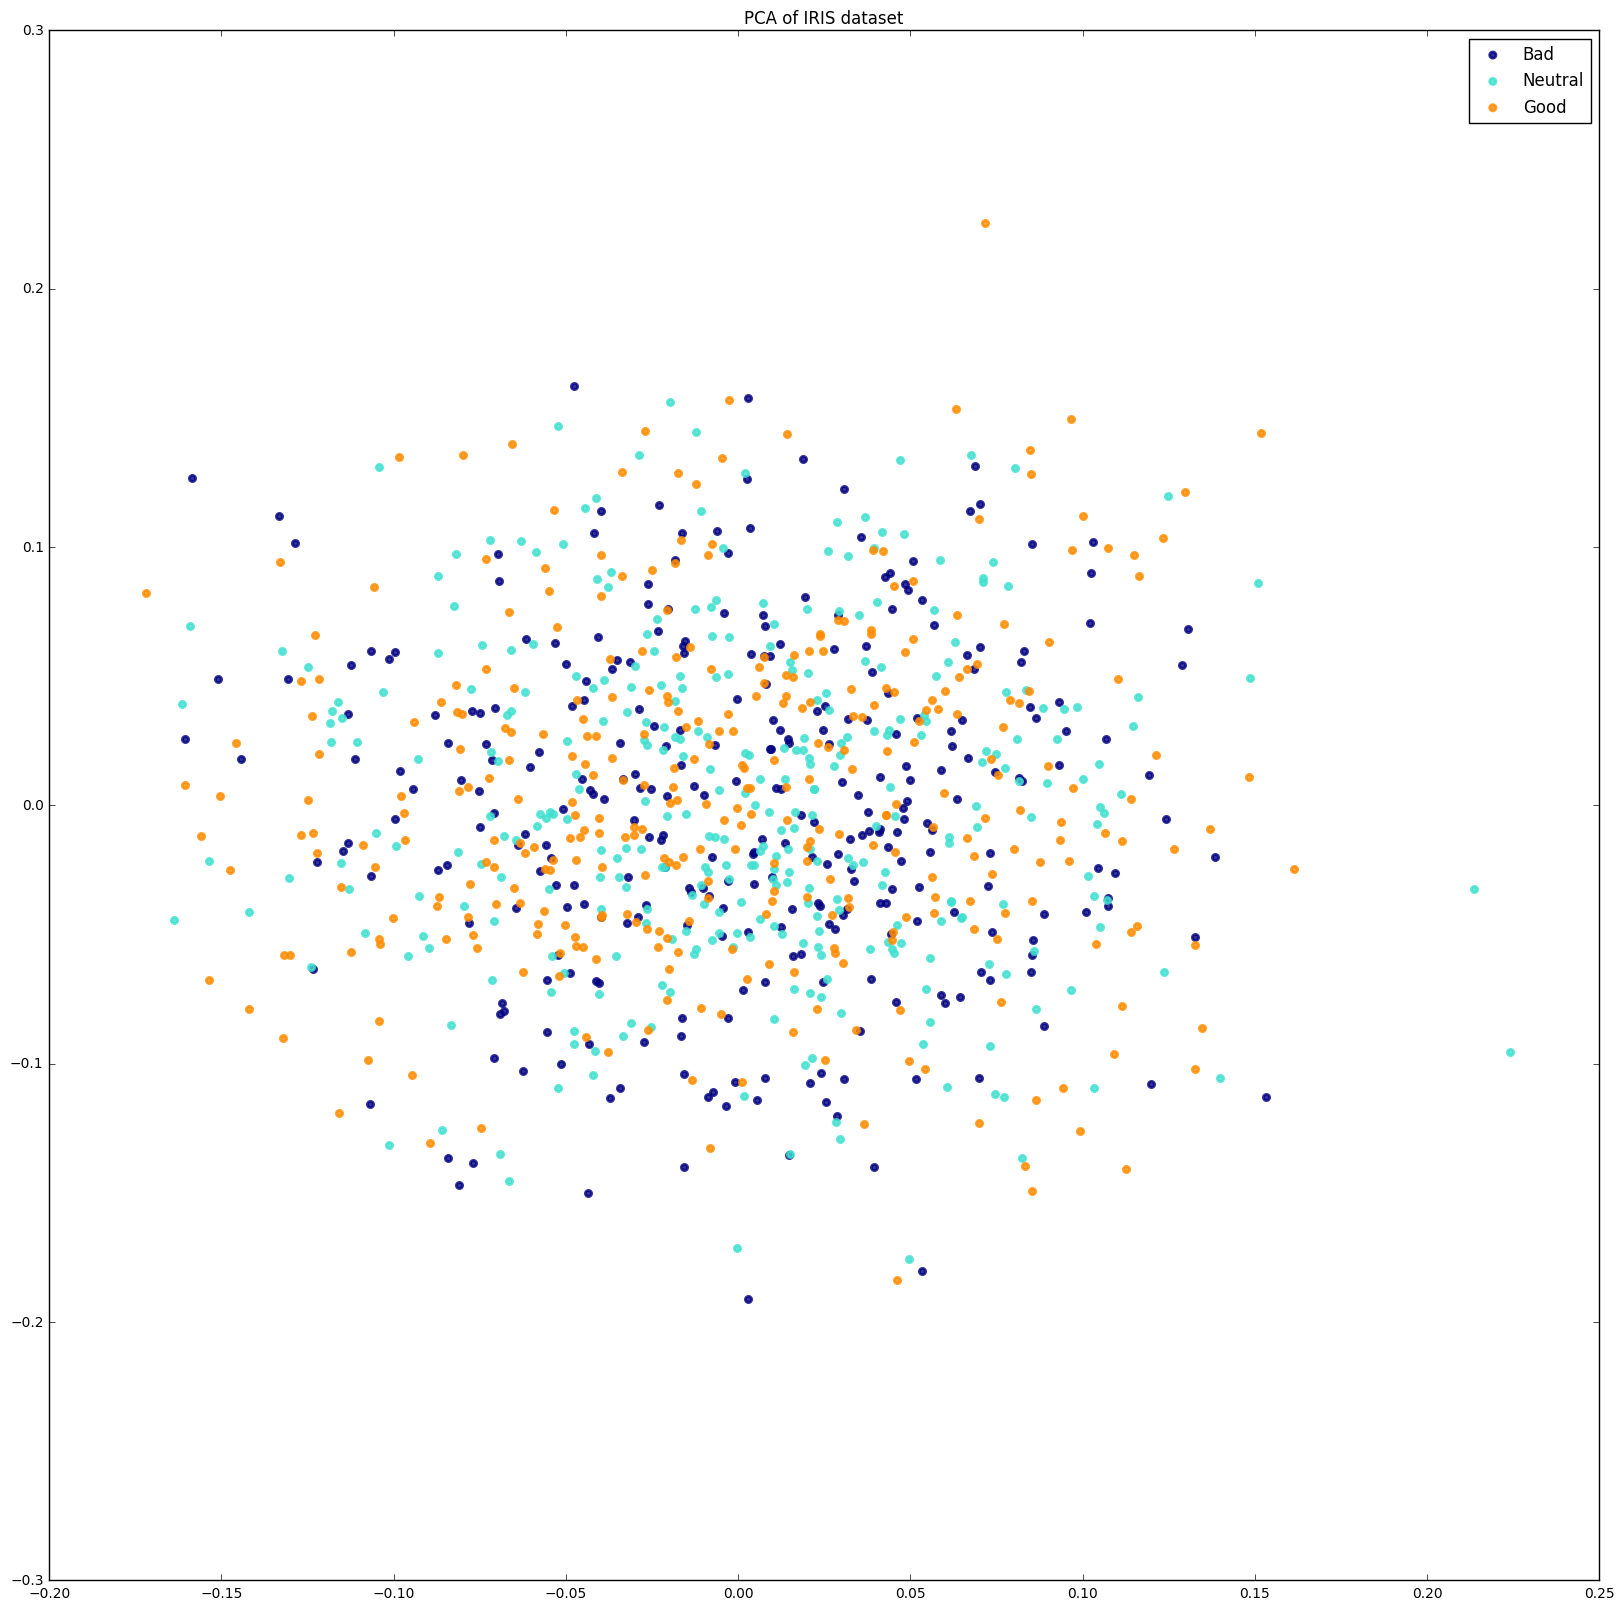

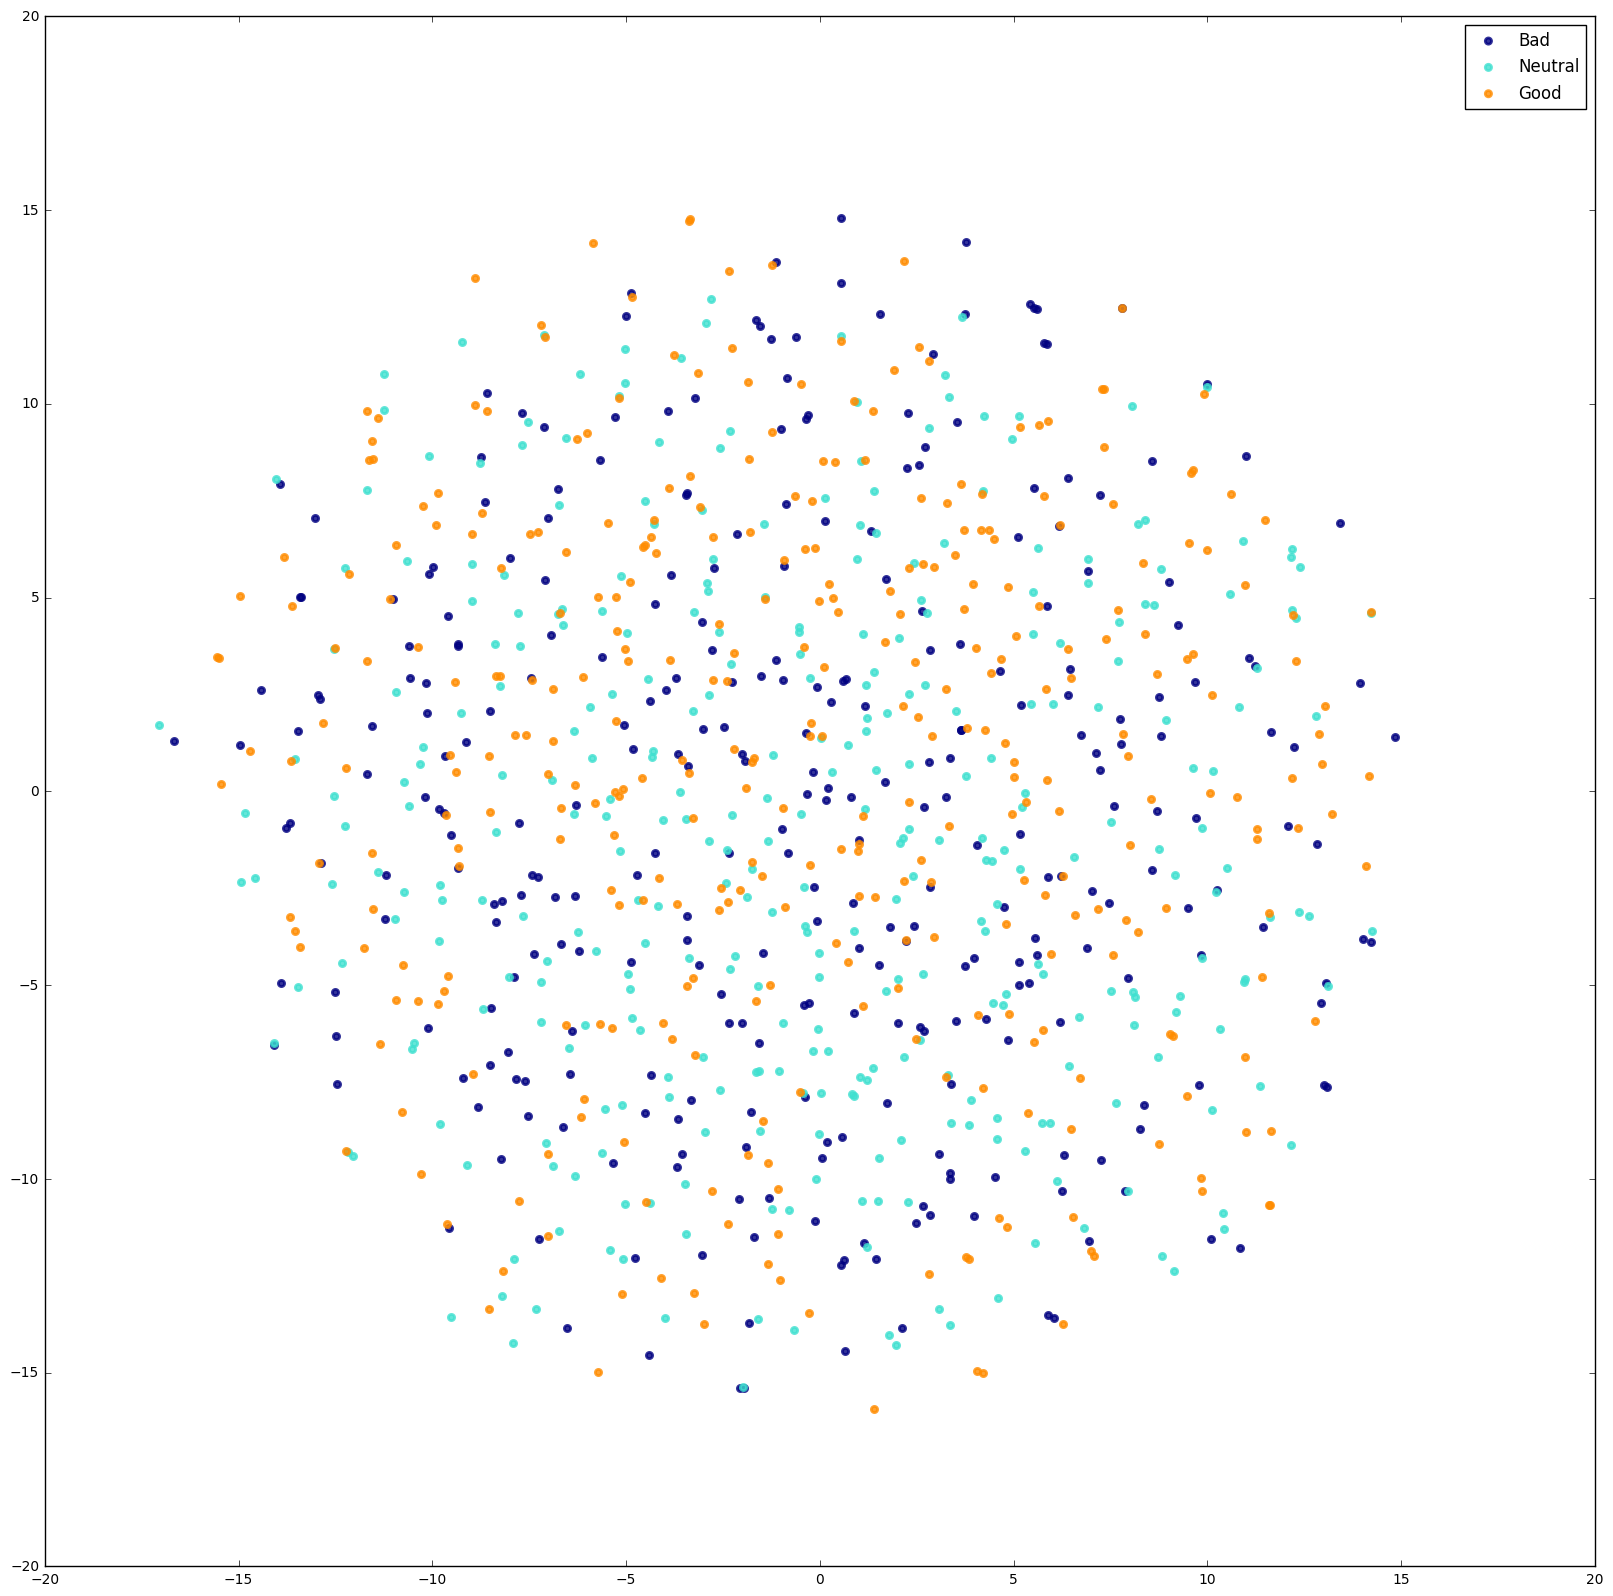

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
X = np.random.rand(1000, 100)
y = np.random.random_integers(-1,1,1000)
pca = PCA(n_components=2)
X = preprocessing.normalize(X, norm='l2')
X_r = pca.fit(X).transform(X)
target_names = ['Bad', 'Neutral', 'Good']
colors = ['navy', 'turquoise', 'darkorange']

plt.figure(figsize=(20,20))
lw = 2

for color, i, target_name in zip(colors, [-1, 0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
X_r2 = model.fit_transform(X)
plt.figure(figsize=(20,20))
for color, i, target_name in zip(colors, [-1, 0, 1], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [85]:
companies = ['alfabank', 'gazprom', 'raiffeisen', 'rshb', 'sberbank', 'uralsib', 'vtb']
companies2 = ['beeline', 'date', 'komstar', 'megafon', 'mts', 'rostelecom', 'skylink','tele2']
df_dict[files[5]].columns

Index(['beeline', 'date', 'komstar', 'megafon', 'mts', 'rostelecom', 'skylink',
       'tele2', 'text', 'twitid'],
      dtype='object')

In [160]:
df = df_dict[files[0]]

In [168]:
def get_norm_dataframe(df, companies):
    new_df = {}
    texts = []
    labels = []
    strange_facts = []
    for i in range(len(df)):
        ranks = []
        for companie in companies:
            try:
                label = df[companie][i]
                if label == '0' or label == '-1' or label == '1' or label == 0.0 or label == -1.0 or label == 1.0:
                    ranks.append(int(label))
            except Exception:
                continue
        ranks = np.array(ranks)
        text = df['text'][i]
        if len(ranks) == 0:
            texts.append(text)
            labels.append(None)
            strange_facts.append('label is None')
            continue
        strange_fact = None
        if len(ranks) > 1:
            strange_fact = 'a few labels'
        label = np.bincount(ranks + 1).argmax() - 1
        texts.append(text)
        labels.append(label)
        strange_facts.append(strange_fact)
    new_df = {'text': pd.Series(texts), 'label': pd.Series(labels), 'strang_fact': pd.Series(strange_facts)}
    new_df = pd.DataFrame(new_df)
    return new_df

In [186]:
subdir = './datasets/twitter/'
for file in files[3:]:
    old_df = df_dict[file]
    old_df.index = range(len(old_df))
    df = get_norm_dataframe(old_df, companies2)
    name = 'short_' + path.basename(file)
    df.to_csv(path.join(subdir, name))

In [193]:
test_df = pd.read_csv('./datasets/twitter/short_ttk_test_etalon.csv')

In [194]:
test_df['label'].unique()

array([-1,  1,  0])